In [365]:
import numpy as np 
import pandas as pd 

# Проект по выявлению факторов, влияющих на сердечную недостаточность

**Описание проекта**
Сердечно-сосудистые заболевания (ССЗ) являются причиной смерти номер 1 во всем мире, унося примерно 17,9 миллиона жизней ежегодно, что составляет 31% всех смертей в мире. Четыре из 5 смертей от сердечно-сосудистых заболеваний связаны с сердечными приступами и инсультами, и одна треть этих смертей происходит преждевременно среди людей в возрасте до 70 лет. Сердечная недостаточность является распространенным явлением, вызванным сердечно-сосудистыми заболеваниями, и этот набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.


**Информация об атрибутах**

- Age: возраст пациента [лет]
- Sex: пол пациента [М: Мужской, F: Женский]
- ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: неангинальная боль, ASY: бессимптомная]
- RestingBP: артериальное давление в состоянии покоя [мм рт.ст.]
- Cholesterol: холестерин сыворотки [мм/дл]
- FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе]
- RestingECG: результаты электрокардиограммы в покое [норма: нормальная, ST: аномалия ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]
- MaxHR: максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
- ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]
- Oldpeak: старый пик = ST [Числовое значение, измеренное в депрессии]
- ST_Slope: наклон сегмента ST пикового упражнения [Вверх: восходящий, Плоский: плоский, Вниз: нисходящий]
- HeartDisease: выходной класс [1: болезнь сердца, 0: нормальный]

**Цель проекта**
Найти закономерности между болезнью сердца и другими характеристиками пациента.

## Набор данных для прогнозирования сердечной недостаточности

### Общие сведения

In [366]:
sample = pd.read_csv('heart.csv')

Откроем первые 10 строк с данными:

In [367]:
sample.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Посмотрим общую информацию:

In [368]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Убедимся, что в данных нет пропусков:

In [369]:
sample.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Убедимся, что нет явных дубликатов:

In [370]:
sample.duplicated().sum()

0

Оценим, какой процент наблюдаемых имеет болезни сердца и как это выглядит на гистограмме.

In [371]:
HeartDisease=sample['HeartDisease'].value_counts().reset_index()
a = HeartDisease['HeartDisease'].sum()
HeartDisease['percent'] = HeartDisease['HeartDisease']/a*100
np.round(HeartDisease,0)

,index,HeartDisease,percent
0,1,508,55.0
1,0,410,45.0


<AxesSubplot:>

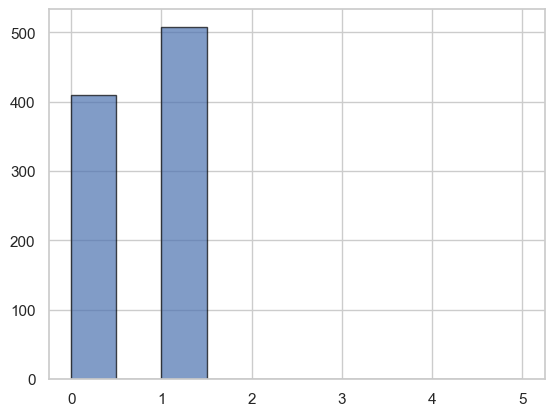

In [372]:
sample['HeartDisease'].hist(range =(0,5), alpha=0.7, edgecolor='black')

## Анализ параметров выборки.

### Возраст

<AxesSubplot:>

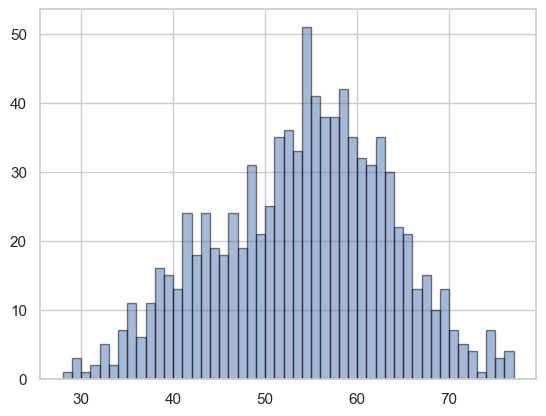

In [373]:
sample['Age'].hist(bins=49, alpha=0.5, edgecolor='black')

In [374]:
sample['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

Среднестатистический возраст согласно выборке 53-55 лет (это видно и на диаграмме и в таблице стат.характеристик). Минимальный возраст - 28 лет, максимальный - 77 лет. Межквартильный размах - возраст от 47 до 60 лет.

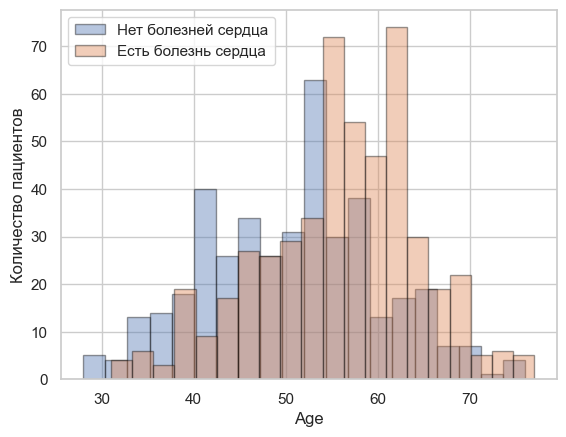

In [375]:
import matplotlib.pyplot as plt

sample.groupby('HeartDisease')['Age'].plot(kind='hist', bins=20, alpha=0.4, edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('Age')
plt.ylabel('Количество пациентов')
plt.show()

На графике видно, как после 55 лет учащаются случаи сердечных заболеваний.

### Пол

Изменим тип данных в столбце Sex с объекта на числовой:

In [376]:
def new_sex(x):
    if x == 'M':
        return 1
    return 0
sample['Sex']=sample['Sex'].apply(new_sex)

In [377]:
sex=sample['Sex'].value_counts().reset_index()
sex

,index,Sex
0,1,725
1,0,193


<AxesSubplot:ylabel='Sex'>

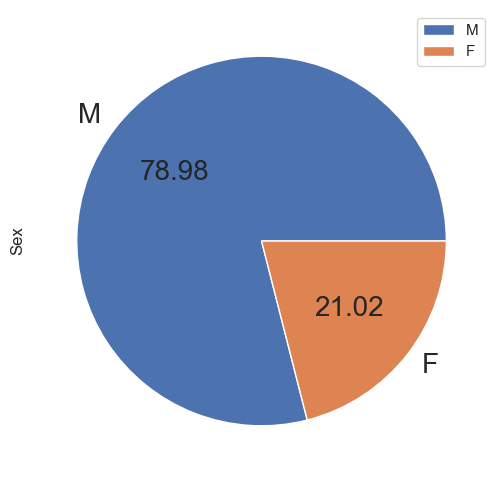

In [378]:
sex.plot.pie(y='Sex',labels=["M", "F"],autopct="%.2f", fontsize=20, figsize=(6, 6))

Большинство пациентов в выборке мужчины, женщин всего 21.02%.

In [379]:
sample.groupby(['HeartDisease','Sex']).agg(Patients=('Sex', 'count'))


Patients
HeartDisease Sex          
0            0         143
             1         267
1            0          50
             1         458

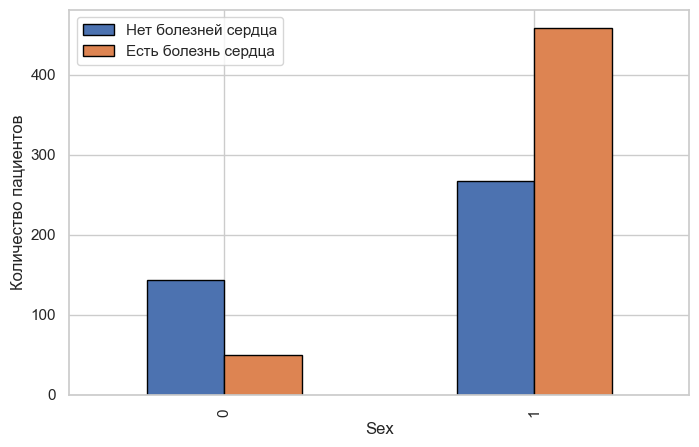

In [380]:
pict_1 = sample.pivot_table(index='Sex',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.ylabel('Количество пациентов')
plt.show()

В сгруппированной таблице и на графике видно, что здоровых женщин (группа 0) почти в три раза больше, чем с болезнью сердца. У мужчин всё наоборот (группа 1), больных мужчин в два раза больше, чем здоровых. Но так как в выборке очень мало женщин, нельзя утверждать что пол и болезни сердца как то связаны. Проверим эту гипотезу позже.

### Тип боли в груди.

In [381]:
ChestPainType=sample['ChestPainType'].value_counts().reset_index()
b = ChestPainType['ChestPainType'].sum()
ChestPainType['percent'] = ChestPainType['ChestPainType']/a*100
np.round(ChestPainType,0)

,index,ChestPainType,percent
0,ASY,496,54.0
1,NAP,203,22.0
2,ATA,173,19.0
3,TA,46,5.0


[TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомное течение]

Из таблицы видно, что у 54% пациентов бессимптомное течение болезни.

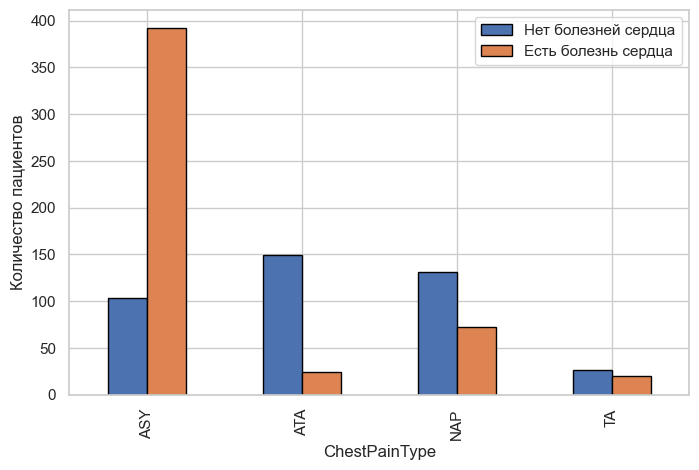

In [382]:
pict_2 = sample.pivot_table(index='ChestPainType',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])

plt.ylabel('Количество пациентов')
plt.show()

На графике видно, что пациенты с атипичной стенокардией реже других имеют сердечные заболевания, среди пациентов с неагинальной болью почти в два раза больше здоровых, а вот среди пациентов с бессимптомным течением болезни в 4 раза больше людей с сердечными заболеваниями. 

### Артериальное давление в состоянии покоя.

<AxesSubplot:>

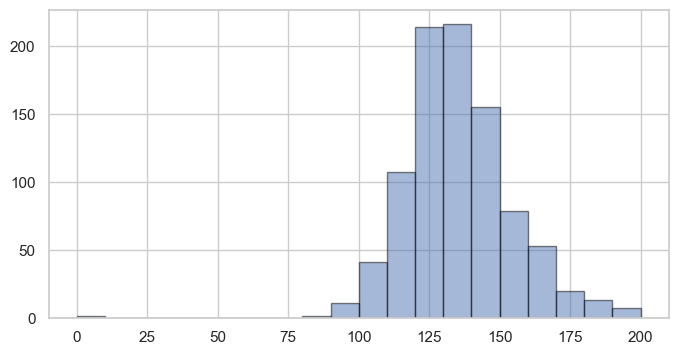

In [383]:
sample['RestingBP'].hist(bins=20, alpha=0.5, figsize=(8,4), edgecolor='black')

In [384]:
sample['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

На графике мы видим, что давление в состоянии покоя у большинства пациентов 120-140 мм.рт.ст. (нормальное давление). Максимальное давление в выборке - 200 мм.рт.ст. 

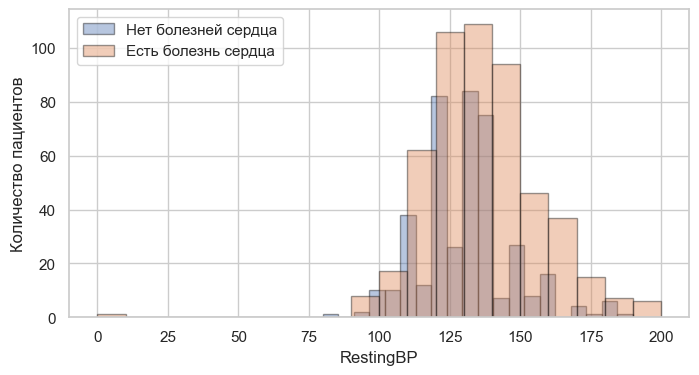

In [385]:
sample.groupby('HeartDisease')['RestingBP'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 4), edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('RestingBP')
plt.ylabel('Количество пациентов')
plt.show()

Давление выше 140 мм.рт.ст. чаще встречается у пациентов с сердечными заболеваниями. Пациенты с максимальным давлением 200 мм.рт.ст. имеют проблемы с сердцем.

Посмотрим, есть ли взаимосвязь между возрастом и артериальным давлением:

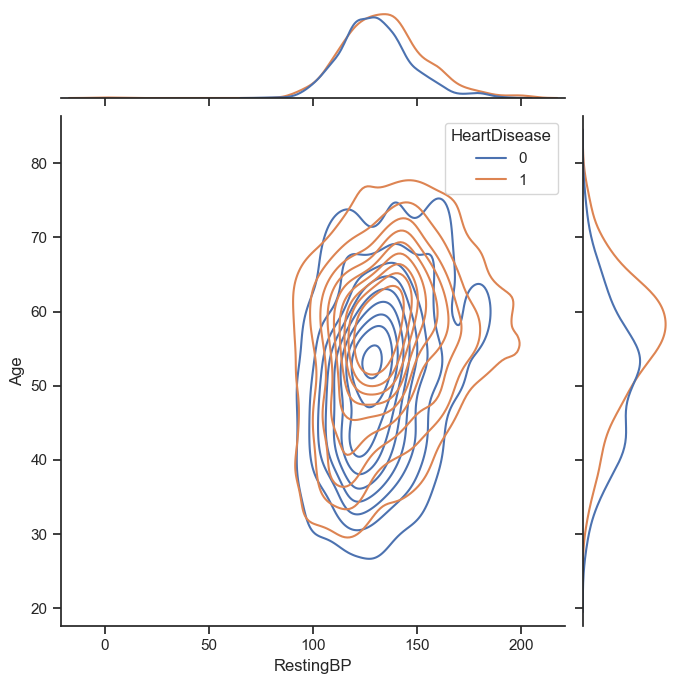

In [386]:
import seaborn as sns
sns.set_theme(style="ticks")
f = sns.jointplot(
    data=sample,
    x="RestingBP", y="Age", hue='HeartDisease',kind="kde", height=7, ratio=5)

Есть небольшая взаимосвязь. После 53 лет виден рост числа пациентов с болезнями сердца и повышенным артериальным давлением. 

### Холестерин сыворотки.

<AxesSubplot:>

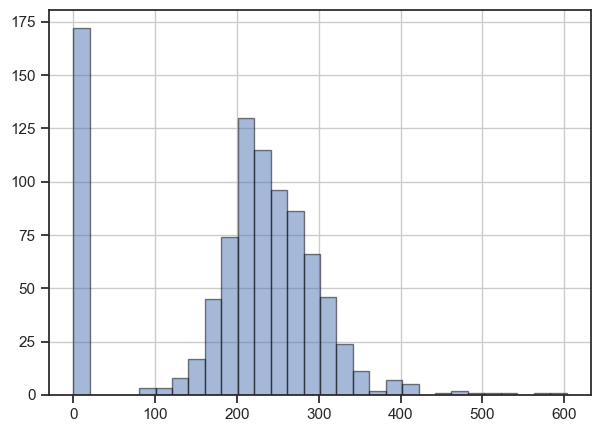

In [387]:
sample['Cholesterol'].hist(bins=30, alpha=0.5, figsize=(7, 5), edgecolor='black')

In [388]:
sample['Cholesterol'].describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

Средний показатель холестерина по выборке - 198 мм/дл, большинство пациентов находятся в диапазоне 200 - 250 мм/дл. Максимальный уровень холестерина - 603 мм/дл.

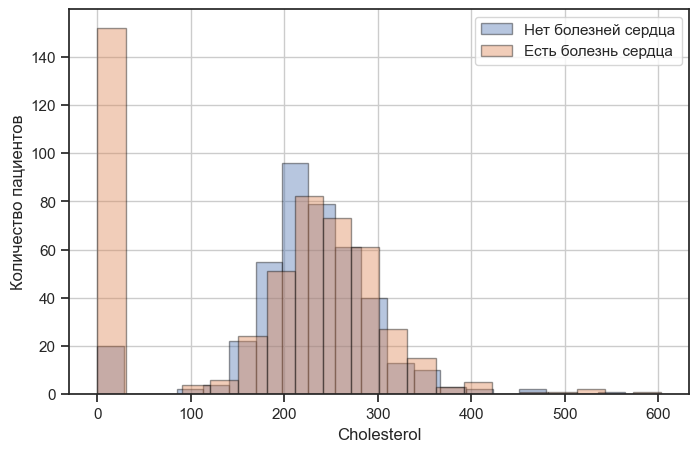

In [389]:
sample.groupby('HeartDisease')['Cholesterol'].plot(kind='hist', bins=20, alpha=0.4, 
                                                   grid = True,figsize=(8, 5), edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])
plt.xlabel('Cholesterol')
plt.ylabel('Количество пациентов')
plt.show()

In [390]:
c = pd.qcut(sample['Cholesterol'], 5).reset_index()
c['HeartDisease'] = sample['HeartDisease']
x = c.groupby(['HeartDisease','Cholesterol']).agg(Patients=('Cholesterol', 'count'))
x['Parcent'] = x['Patients']/x['Patients'].sum()*100
np.round(x,0)

Patients  Parcent
HeartDisease Cholesterol                       
0            (-0.001, 134.8]        25      3.0
             (134.8, 209.0]        113     12.0
             (209.0, 238.2]         98     11.0
             (238.2, 276.0]         97     11.0
             (276.0, 603.0]         77      8.0
1            (-0.001, 134.8]       159     17.0
             (134.8, 209.0]         74      8.0
             (209.0, 238.2]         82      9.0
             (238.2, 276.0]         89     10.0
             (276.0, 603.0]        104     11.0

После отметки в 250 мм/дл пациенты с болезнями сердца встречаются чаще. Еще более отчетливо это видно в таблице (чем выше холестерин, тем больше становиться пациентов с сердечными болезнями и наоборот).

### Уровень сахара в крови натощак

In [391]:
FastingBS=sample['FastingBS'].value_counts().reset_index()
FastingBS

,index,FastingBS
0,0,704
1,1,214


<AxesSubplot:ylabel='FastingBS'>

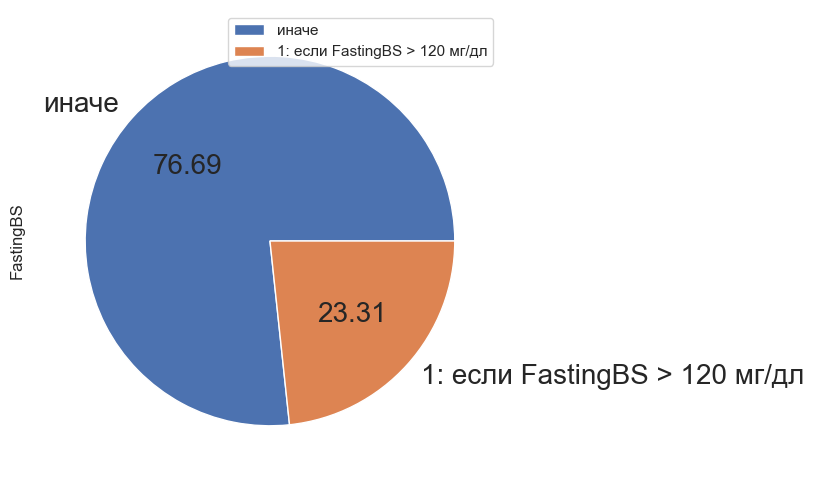

In [392]:
FastingBS.plot.pie(y='FastingBS',labels=["иначе", "1: если FastingBS > 120 мг/дл"],autopct="%.2f", fontsize=20, figsize=(6, 6))

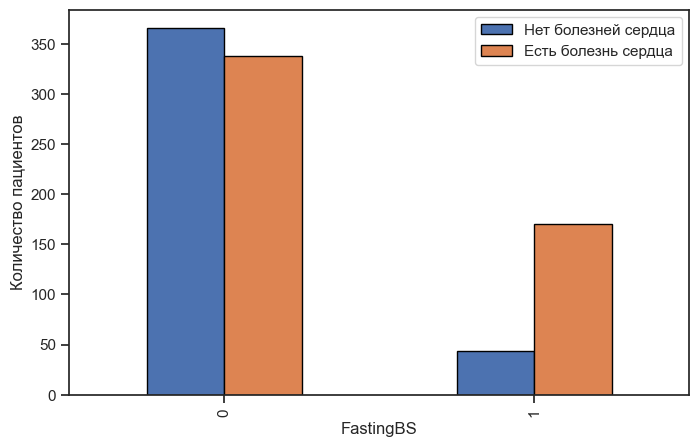

In [393]:
pict_3 = sample.pivot_table(index='FastingBS',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])

plt.ylabel('Количество пациентов')
plt.show()

Пациентов с положительным тестом (уровень сахара в крови натощак больше 120 мг/дл) - 23.3% (группа 1). При этом почти все пациенты с повышенным сахаром имеют болезни сердца, это хорошо видно на диаграмме. 

### ЭКГ в покое.

In [394]:
RestingECG=sample['RestingECG'].value_counts().reset_index()
RestingECG['percent'] = RestingECG['RestingECG']/RestingECG['RestingECG'].sum()*100
np.round(RestingECG,0)

,index,RestingECG,percent
0,Normal,552,60.0
1,LVH,188,20.0
2,ST,178,19.0


ЭКГ в покое: результаты электрокардиограммы в покое [норма: нормальная, ST: аномалия ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]

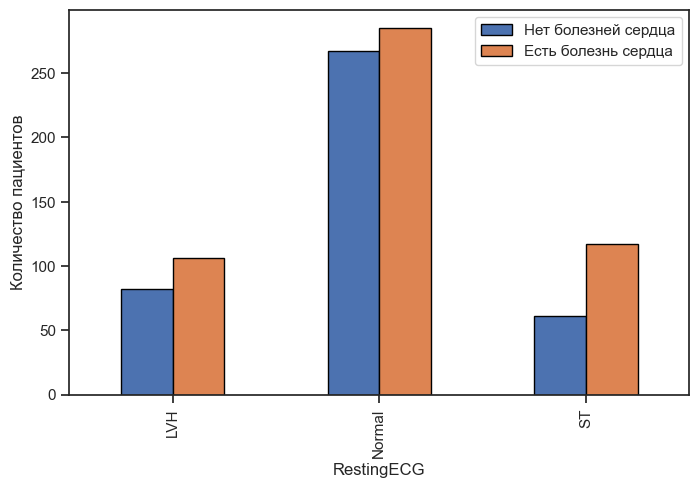

In [395]:
pict_3 = sample.pivot_table(index='RestingECG',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])

plt.ylabel('Количество пациентов')
plt.show()

60% пациентов имеют нормальную электрокардиограмму в покое. Среди них почти равное количество с болезнями сердца(285 человек) и без (267 человек). Самая значительная разница у пациентов с аномалией ST -почти в два раза больше пациентов с болезнями сердца. Гипертрофия левого желудочка тоже мало о чем говорит (пациентов с болезнями сердца больше, но не значительно).

### Максимальная достигнутая частота сердечных сокращений.

<AxesSubplot:>

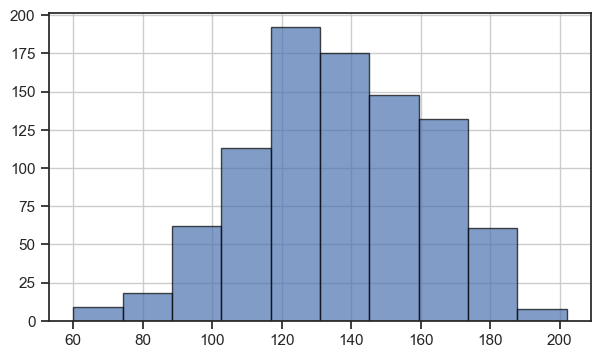

In [396]:
sample['MaxHR'].hist(alpha=0.7, figsize=(7, 4), edgecolor='black')

In [397]:
sample['MaxHR'].describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

Зафиксированный минимум - 60, зафиксированное макс. значение - 202. Большинство пациентов имеют максимальную частоту сердечных сокращений - 120-160. 

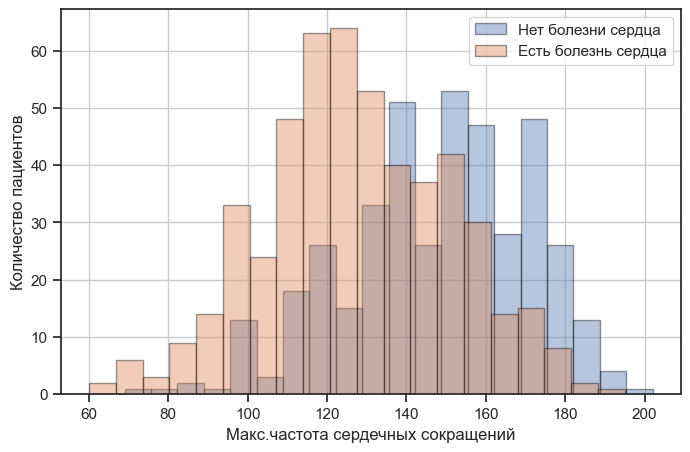

In [398]:
sample.groupby('HeartDisease')['MaxHR'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 5), edgecolor='black')
plt.legend(['Нет болезни сердца','Есть болезнь сердца'])
plt.xlabel('Mакс.частота сердечных сокращений')
plt.ylabel('Количество пациентов')
plt.show()

У пациентов с максимальной частотой сердечных сокращений до 130 ударов заболевания сердца встречаются намного чаще. И наоборот, у пациентов с максимальной частотой сердечных сокращений выше 140 ударов болезни сердца встречаются реже.

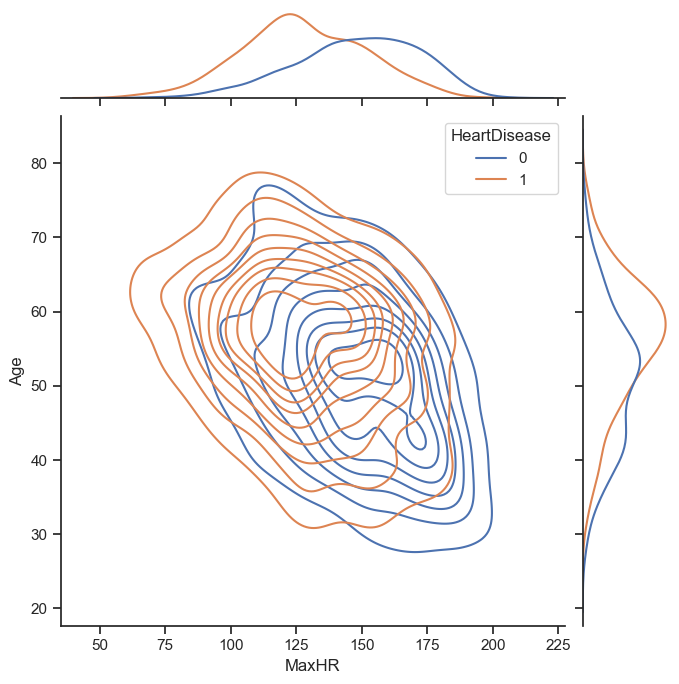

In [399]:
sns.set_theme(style="ticks")
f = sns.jointplot(
    data=sample,
    x="MaxHR", y="Age", hue='HeartDisease',kind="kde", height=7, ratio=5)

Определенно есть зависимость частоты сердечных сокращений от возраста. Это хорошо видно на графике. У более молодых пациентов, не имеющих заболеваний сердца максимальная частота сердечных сокращений - 200, у пожилых людей (после 60 лет) частота сердечных сокращений не превышает 125, причем у людей с заболеваниями этот показатель еще ниже.

### Физическая стенокардия.

In [400]:
ExerciseAngina=sample['ExerciseAngina'].value_counts().reset_index()
ExerciseAngina['percent'] = ExerciseAngina['ExerciseAngina']/ExerciseAngina['ExerciseAngina'].sum()*100
np.round(ExerciseAngina,0)

,index,ExerciseAngina,percent
0,N,547,60.0
1,Y,371,40.0


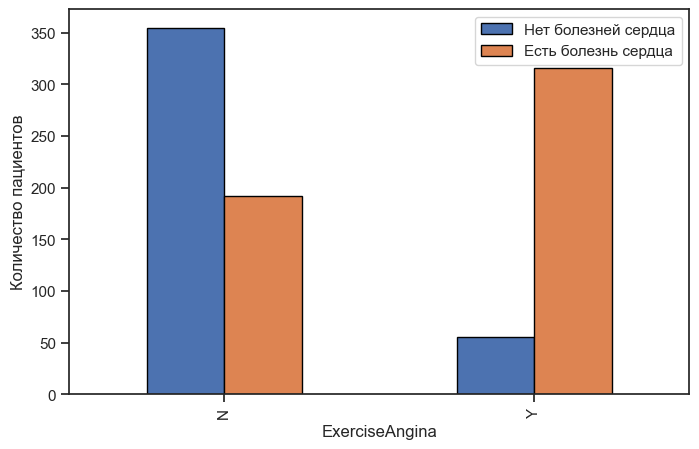

In [401]:
pict_4 = sample.pivot_table(index='ExerciseAngina',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])

plt.ylabel('Количество пациентов')
plt.show()

60% пациентов не имеют стенокардии при физической нагрузке. Среди пациентов, у которых есть стенокардия при физических нагрузках, почти все имеют заболевания сердца.

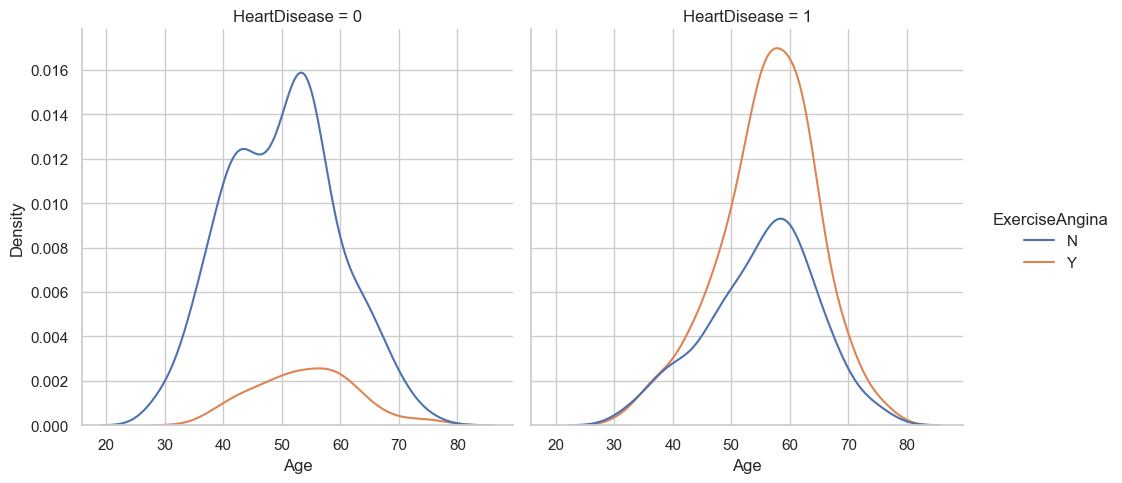

In [402]:
sns.set_theme(style="whitegrid")
sns.displot(
    data=sample,
    x="Age", hue="ExerciseAngina",
    col="HeartDisease", kind="kde")

На первом графике видно, что у здоровых пациентов в основном нет стенокардии при физических нагрузках и их возраст - 40 - 55 лет. На втором графике пациенты с болезнями сердца: здесь больше пациентов которые имеют стенокардию при физической нагрузке и их возраст в основном 55-65 лет (можно сказать, что эта группа старше предыдущей). 

### Числовое значение, измеренное в депрессии.

<AxesSubplot:>

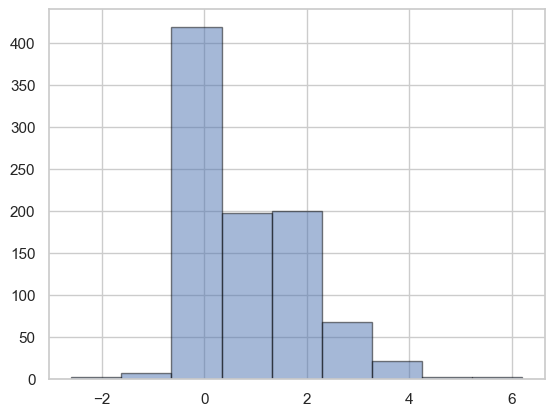

In [403]:
sample['Oldpeak'].hist(bins=9, alpha=0.5, edgecolor='black')

In [404]:
sample['Oldpeak'].describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

Числовое значение, измеренное в депресии, в основном находится в пределах от 0 до 1.5. Максимальное значение 6.2

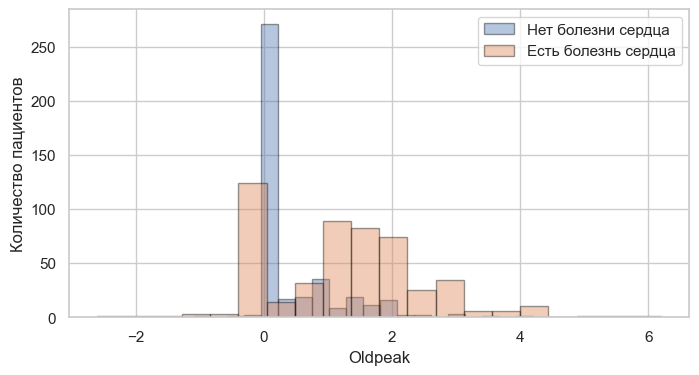

In [405]:
sample.groupby('HeartDisease')['Oldpeak'].plot(kind='hist', bins=20, alpha=0.4, grid = True,figsize=(8, 4), edgecolor='black')
plt.legend(['Нет болезни сердца','Есть болезнь сердца'])
plt.xlabel('Oldpeak')
plt.ylabel('Количество пациентов')
plt.show()

У здоровых пациентов oldpeak находится в пределах от 0 до 2. У пациентов с болезнями сердца - в пределах от 0 до 4.5.

In [406]:
w = pd.cut(sample['Oldpeak'], 5).reset_index()
w['HeartDisease'] = sample['HeartDisease']
k = w.groupby(['HeartDisease','Oldpeak']).agg(Patients=('Oldpeak', 'count'))
k['Parcent'] = k['Patients']/k['Patients'].sum()*100
np.round(k,0)

Patients  Parcent
HeartDisease Oldpeak                           
0            (-2.609, -0.84]         1      0.0
             (-0.84, 0.92]         319     35.0
             (0.92, 2.68]           85      9.0
             (2.68, 4.44]            5      1.0
             (4.44, 6.2]             0      0.0
1            (-2.609, -0.84]         6      1.0
             (-0.84, 0.92]         173     19.0
             (0.92, 2.68]          270     29.0
             (2.68, 4.44]           56      6.0
             (4.44, 6.2]             3      0.0

В таблице также видно, что доля здоровых пациентов при повышении показателя oldpeak резко снижается. У больных пациентов сначала идет рост в зависимости от oldpeak, после отметки 2.7 плавное снижение. 

### Наклон сегмента ST.

In [407]:
ST_Slope=sample['ST_Slope'].value_counts().reset_index()
ST_Slope['percent'] = ST_Slope['ST_Slope']/ST_Slope['ST_Slope'].sum()*100
np.round(ST_Slope,0)

,index,ST_Slope,percent
0,Flat,460,50.0
1,Up,395,43.0
2,Down,63,7.0


ST_Slope: наклон сегмента ST пикового упражнения [Вверх: восходящий, Плоский: плоский, Вниз: нисходящий]

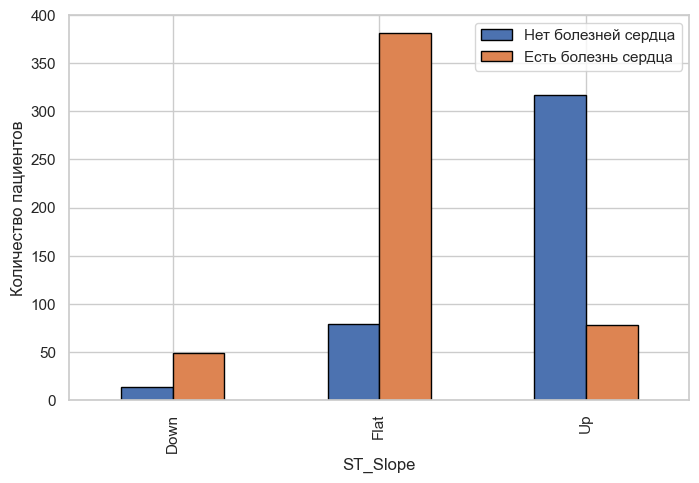

In [408]:
pict_4 = sample.pivot_table(index='ST_Slope',columns='HeartDisease'
                        ,values='Age',aggfunc='count').copy().plot(kind='bar', figsize=(8,5),  edgecolor='black')
plt.legend(['Нет болезней сердца', 'Есть болезнь сердца'])

plt.ylabel('Количество пациентов')
plt.show()

Пациенты с восходящим наклоном чаще находятся в группе не имеющих сердечных заболеваний. Пациенты с плоским наклоном наоборот в основном в группе с болезнями сердца. Пациенты с нисходящим уклоном тоже в чаще попадают в группу с сердечными заболеваниями.  

## Выбросы.

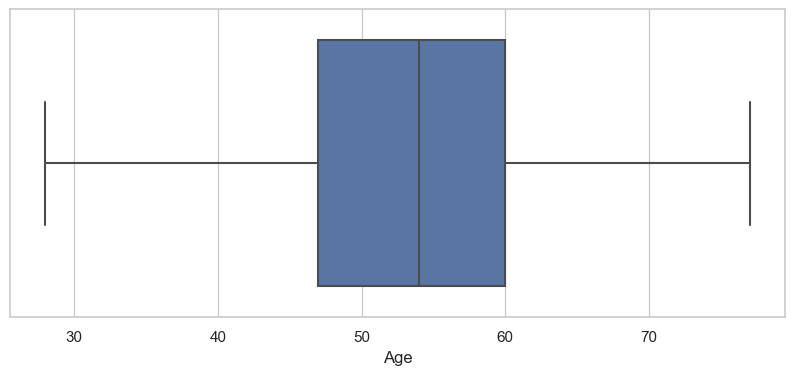

In [409]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sample["Age"])
plt.show()

Показатель возраст не имеет выбрасов.

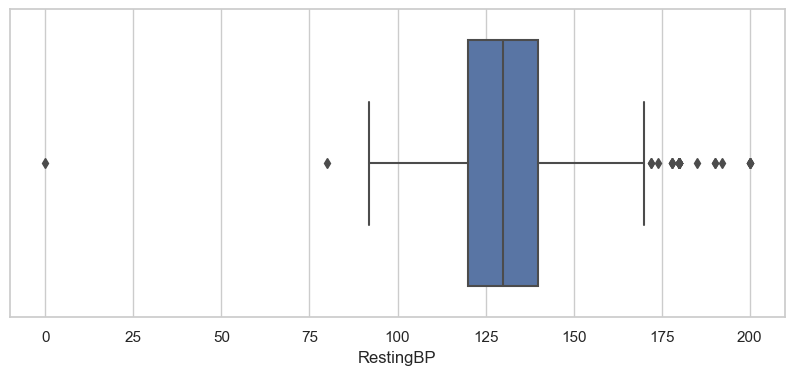

In [410]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sample["RestingBP"])
plt.show()

Артериальное давление не может быть равно нулю. Это явный выброс. Удалим эти строки из таблицы.

In [411]:
sample_new = sample.copy()
sample_new = sample_new[sample_new['RestingBP'] != 0]
print('Удалили данных:',(1-len(sample_new['RestingBP'])/len(sample['RestingBP']))*100, 'процентов')

Удалили данных: 0.10893246187363426 процентов


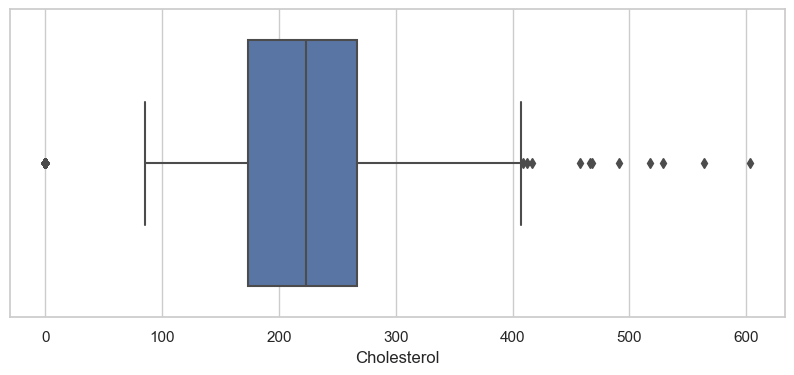

In [412]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sample["Cholesterol"])
plt.show()

Холестерин не должен быть равен нулю. Опять выброс. Удалим и эти данные.

In [413]:
sample_new_1 = sample_new[sample_new['Cholesterol'] != 0]
print('Удалили данных:',(1-len(sample_new_1['Cholesterol'])/len(sample['Cholesterol']))*100, 'процентов')

Удалили данных: 18.73638344226579 процентов


Если удалить холестерин равный нулю, то мы потерям 18 процентов данных. Это очень много, исследование при такой потере данных станет не достоверным. Заменим нули на неизвестное значение.

In [414]:
sample_new['Cholesterol'] = sample_new['Cholesterol'].replace({0:'unknown'})

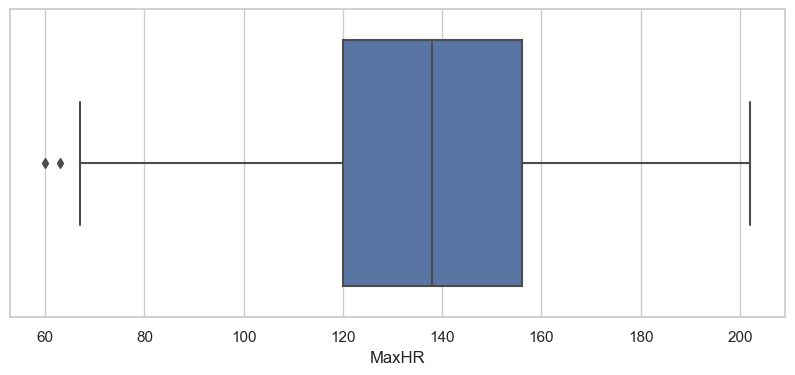

In [415]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sample["MaxHR"])
plt.show()

Максимальная частота сердечных сокращений имеет два выброса. Это реальные показатели пациентов, просто очень редкие. Их удаление исказит данные.

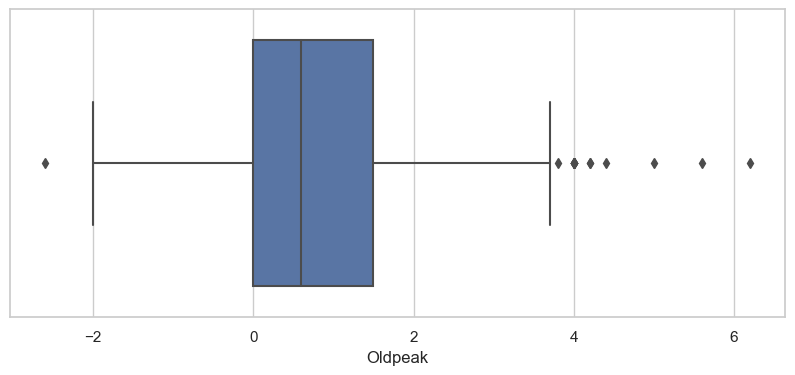

In [416]:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.boxplot(x=sample["Oldpeak"])
plt.show()

В параметре oldpeak есть выбросы. Отрицательные значения. Удалим их.

In [417]:
sample_new = sample_new[sample_new['Oldpeak'] >= 0]
print('Удалили данных:',(1-len(sample_new['Oldpeak'])/len(sample['Oldpeak']))*100, 'процентов')

Удалили данных: 1.525054466230935 процентов


## Оценка взаимосвязей.

Оценим взаимосвязь и построим heatmap:

In [418]:
! pip install phik

Поскольку коэффициент корреляции Пирсона нам показывает только линейную взаимосвязь, применим коэффициент корреляции Phik, он учитывает взаимосвязь между категориальными переменными, а также фиксирует нелинейную зависимость.

In [419]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

Посмотрим, как изменилась взаимосвязь параметров с наличием или отсутсвием болезней сердца у пациентов после очистки выборки от выбросов.

In [420]:
phik_sample = sample.phik_matrix()
phik_sample_new = sample_new.phik_matrix()

interval columns not set, guessing: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
interval columns not set, guessing: ['Age', 'Sex', 'RestingBP', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [421]:
phik_sample['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ChestPainType     0.745661
ExerciseAngina    0.697276
Oldpeak           0.571560
MaxHR             0.526292
Sex               0.455551
Cholesterol       0.430216
FastingBS         0.401149
ST_Slope          0.393847
Age               0.360326
RestingBP         0.128248
RestingECG        0.059519
Name: HeartDisease, dtype: float64

In [422]:
phik_sample_new['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ChestPainType     0.744256
ExerciseAngina    0.702739
Oldpeak           0.580454
MaxHR             0.525949
Cholesterol       0.495585
Sex               0.455791
ST_Slope          0.393197
FastingBS         0.386370
Age               0.359835
RestingBP         0.175390
RestingECG        0.061636
Name: HeartDisease, dtype: float64

Наибольшая связь наблюдается между наличием болезней сердца и типом боли в груди не зависимо от выбросов в выборке, а также наличием стенокардии при физической нагрузке. Высокая взаимосвязь между болезнями сердца наблюдается и с параметрами oldpeak и максимально достигнутой частотой сердечных сокращений. Чуть ниже связь между болезнями сердца и холестерином, полом, наклоном сегмента ST. Тут важно отметить, что после очистки выборки от выбросов выяснилось, что холестерин имеет намного большую взаимосвязь с болезнями сердца, чем пол, а наклон сегмента ST - чем уровень сахара в крови. Возраст и уровень сахара уже слабее коррелируют с болезнями сердца. Очень слабая взаимосвязь между болезнями сердца показателями артериального давления в покое, ЭКГ в покое.

Тепловая карта взаимосвязей:

<AxesSubplot:>

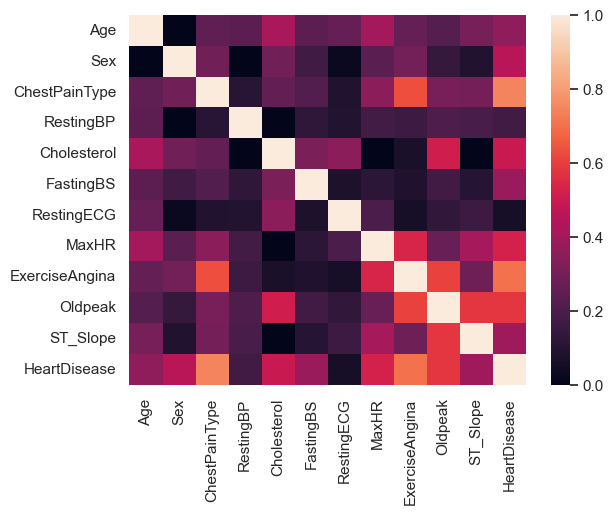

In [423]:
sns.heatmap(phik_sample_new)

## Проверка гипотез.

### Проверка гипотезы: у мужчин чаще встречаются болезни сердца, чем у женщин.

H_0: мужчины с болезнями сердца = женщины с болезнями сердца

H_1: мужчины с болезнями сердца ≠ женщины с болезнями сердца

Пороговое значение:
alpha = 0.01

In [424]:
from scipy import stats as st
men = sample_new[sample_new['Sex'] == 1]
women = sample_new[sample_new['Sex'] == 0]

In [425]:
results = st.ttest_ind(men['HeartDisease'],women['HeartDisease'], equal_var = False)
print(results.pvalue)
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.3997049867191644e-21
Отвергаем нулевую гипотезу


С вероятностью в 99% различия между мужчинами и женщинами статистически значимы.

### Проверка гипотезы: если у пациента уровень сахара в крови больше 120 мг/дл, то он чаще имеет сердечные заболевания.

H_0: пациенты с уровнем сахара выше 120 мг/дл = пациенты с уровнем сахара ниже 120 мг/дл

H_1: пациенты с уровнем сахара выше 120 мг/дл ≠ пациенты с уровнем сахара ниже 120 мг/дл

alpha = 0.01

In [426]:
sh_120 = sample_new[sample_new['FastingBS'] == 1]
sh = sample_new[sample_new['FastingBS'] == 0]

In [427]:
results = st.ttest_ind(sh_120['HeartDisease'],sh['HeartDisease'], equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.11720748291303e-17
Отвергаем нулевую гипотезу


С вероятностью в 99% различия между пациентами с повышенным сахаром в крови и нормальным уровнем сахара в крови статистически значимы.

### Проверка гипотезы: пациенты старше 60 лет имеют сердечные заболевания.
 
Н_0: пациенты старше 60 лет = пациенты моложе 60 лет

H_1: пациенты старше 60 лет ≠ пациенты моложе 60 лет

alpha = 0.01

In [428]:
age_70 = sample_new[sample_new['Age'] > 60]
age = sample_new[sample_new['Age'] <= 60]

In [429]:
results = st.ttest_ind(age_70['HeartDisease'],age['HeartDisease'],equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.1646717282909608e-10
Отвергаем нулевую гипотезу


С вероятностью в 99% различия между пациентами моложе 60 лет и старше 60 лет статистически значимы.

### Проверка гипотезы: пациенты с повышенным холестерином чаще страдают от сердечных заболеваний.
 
Н_0: пациенты с повышенным холестерином = пациенты с нормальным холестерином

H_1: пациенты с повышенным холестерином ≠ пациенты с нормальным холестерином

alpha = 0.01

In [430]:
chol = sample[sample['Cholesterol'] > 280]
chol_n = sample[(sample['Cholesterol'] <= 280)&(sample['Cholesterol']!=0)]
results = st.ttest_ind(chol['HeartDisease'],chol_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.0018424723370652023
Отвергаем нулевую гипотезу


С вероятностью в 99% между пациентами с холестерином выше 280 мм/дл и пациентами с уровнем холестерина 280 мм/дл и ниже есть статистически значимые различия.

### Проверка гипотезы: пациенты с повышенным артериальным давлением в покое чаще страдают от сердечных заболеваний.
 
Н_0: пациенты с повышенным АД = пациенты с нормальным АД

H_1: пациенты с повышенным АД ≠ пациенты с нормальным АД

alpha = 0.01

In [431]:
ad = sample_new[sample_new['RestingBP'] > 140]
ad_n = sample_new[sample_new['RestingBP'] <= 140]
results = st.ttest_ind(ad['HeartDisease'],ad_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу')

3.6305200938335394e-06
Отвергаем нулевую гипотезу


С вероятностью в 99% между пациентами с повышенным АД в покое и пациентами с нормальным АД есть статистически значимые различия.

### Проверка гипотезы: пациенты со стенокардией вызванной физической нагрузкой имеют сердечные заболевания.
 
Н_0: пациенты со стенокардией при физ.нагрузке = пациенты без стенокардии при физ.нагрузке

H_1: пациенты со стенокардией при физ.нагрузке ≠ пациенты без стенокардии при физ.нагрузке

alpha = 0.01

In [432]:
def new_EA(x):
    if x == 'Y':
        return 1
    return 0
sample_new['ExerciseAngina']=sample_new['ExerciseAngina'].apply(new_EA)


In [433]:
ea = sample_new[sample_new['ExerciseAngina'] == 1]
ea_n = sample_new[sample_new['ExerciseAngina'] == 0]
results = st.ttest_ind(ea['HeartDisease'],ea_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу')

2.277151848950301e-63
Отвергаем нулевую гипотезу


С вероятностью в 99% между пациентами в этой группе есть статистически значимые различия.

### Проверка гипотезы: пациенты с максимально достигнутой частотой сердечных сокращений 120 имеют болезни сердца. 
 
Н_0: пациенты с максимально достигнутой частотой сердечных сокращений 120 = пациенты с максимально достигнутой частотой сердечных сокращений выше 120

H_1: пациенты с максимально достигнутой частотой сердечных сокращений 120 ≠ пациенты с максимально достигнутой частотой сердечных сокращений выше 120

alpha = 0.01

In [434]:
maxHR_120 = sample_new[sample_new['MaxHR'] <= 130]
maxHR = sample_new[sample_new['MaxHR'] > 130]
results = st.ttest_ind(maxHR_120['HeartDisease'],maxHR['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу')

3.8442223927859707e-32
Отвергаем нулевую гипотезу


С вероятностью в 99% между пациентами c макс. частотой сердечных сокращений меньше 130 и частотой сердечных сокращений 130 ударов и больше есть статистически значимые различия.

### Проверка гипотезы: пациенты с oldspeak выше 3.0 чаще имеют болезни сердца. 
 
Н_0: пациенты с oldspeak выше 2 = пациенты с oldspeak ниже 2 или равно 2

H_1: пациенты с oldspeak выше 2 ≠ пациенты с oldspeak ниже 2 или равно 2

alpha = 0.01

In [435]:
old_n = sample_new[sample_new['Oldpeak'] <= 2.0]
old = sample_new[sample_new['Oldpeak'] > 2.0]
results = st.ttest_ind(old['HeartDisease'],old_n['HeartDisease'],equal_var = False)
print(results.pvalue) 
print('Отвергаем нулевую гипотезу')

8.646948074127677e-25
Отвергаем нулевую гипотезу


С вероятностью в 99% между пациентами в этой группе есть статистически значимые различия.

**Вывод**

Проведен анализ факторов, которые оказывают влияние на сердечно-сосудистые заболевания. В ходе исследования выявлено, что самое сильное влияние имеет тип боли в груди и стенокардия при физической нагрузке. Были выдвинуты гипотезы, из которых мы узнали, что статистически важные различая дают такие параметры пациента как уровень сахара в крови, холестерин, возраст старше 60 лет, пол и артериальное давление. На основе проведенного анализа можно строить дальнейшие модели по выявлению сердечно-сосудистых заболеваний и строить прогнозы при наличии определенных рисков.